In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import zipcodes as zcode
import statsmodels.api as sm

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\Loan_Modelling.csv')
df.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,...,ZIPCode.1,Family.1,CCAvg.1,Education.1,Mortgage.1,Personal_Loan.1,Securities_Account.1,CD_Account.1,Online.1,CreditCard.1
0,1,25,1,49,91107,4,1.6,1,0,0,...,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,...,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,...,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,...,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.drop('ID',axis=1,inplace=True)
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,...,ZIPCode.1,Family.1,CCAvg.1,Education.1,Mortgage.1,Personal_Loan.1,Securities_Account.1,CD_Account.1,Online.1,CreditCard.1
0,25,1,49,91107,4,1.6,1,0,0,1,...,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,...,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,...,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,...,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,...,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Experience            5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   ZIPCode               5000 non-null   int64  
 4   Family                5000 non-null   int64  
 5   CCAvg                 5000 non-null   float64
 6   Education             5000 non-null   int64  
 7   Mortgage              5000 non-null   int64  
 8   Personal_Loan         5000 non-null   int64  
 9   Securities_Account    5000 non-null   int64  
 10  CD_Account            5000 non-null   int64  
 11  Online                5000 non-null   int64  
 12  CreditCard            5000 non-null   int64  
 13  ID.1                  5000 non-null   int64  
 14  Age.1                 5000 non-null   int64  
 15  Experience.1         

In [5]:
df.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,...,ZIPCode.1,Family.1,CCAvg.1,Education.1,Mortgage.1,Personal_Loan.1,Securities_Account.1,CD_Account.1,Online.1,CreditCard.1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,...,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,...,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,...,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,...,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,...,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,...,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,...,ZIPCode.1,Family.1,CCAvg.1,Education.1,Mortgage.1,Personal_Loan.1,Securities_Account.1,CD_Account.1,Online.1,CreditCard.1
1814,48,22,79,95747,3,0.7,2,0,0,0,...,95747,3,0.7,2,0,0,0,0,1,0
4640,30,6,42,90034,1,2.1,3,0,0,0,...,90034,1,2.1,3,0,0,0,0,1,0
4683,52,28,149,92121,2,0.4,1,0,0,0,...,92121,2,0.4,1,0,0,0,0,0,0
1626,31,6,180,93108,2,6.7,1,0,0,0,...,93108,2,6.7,1,0,0,0,0,0,0
2035,36,10,29,93065,4,1.0,1,0,0,0,...,93065,4,1.0,1,0,0,0,0,1,1


In [7]:
print(df.nunique())

Age                       45
Experience                47
Income                   162
ZIPCode                  467
Family                     4
CCAvg                    108
Education                  3
Mortgage                 347
Personal_Loan              2
Securities_Account         2
CD_Account                 2
Online                     2
CreditCard                 2
ID.1                    5000
Age.1                     45
Experience.1              47
Income.1                 162
ZIPCode.1                467
Family.1                   4
CCAvg.1                  108
Education.1                3
Mortgage.1               347
Personal_Loan.1            2
Securities_Account.1       2
CD_Account.1               2
Online.1                   2
CreditCard.1               2
dtype: int64


In [8]:
for c in df.columns:
    print(c,df[c].unique())

Age [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
ZIPCode [91107 90089 94720 94112 91330

In [9]:
print('unique data for all\n')
for c in df.columns:
    print(c,df[c].unique(),sep='\n--------------------------\n')

unique data for all

Age
--------------------------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience
--------------------------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income
--------------------------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 1

In [10]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'ID.1', 'Age.1', 'Experience.1',
       'Income.1', 'ZIPCode.1', 'Family.1', 'CCAvg.1', 'Education.1',
       'Mortgage.1', 'Personal_Loan.1', 'Securities_Account.1', 'CD_Account.1',
       'Online.1', 'CreditCard.1'],
      dtype='object')

In [11]:
cat_cols=['Family','Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']
cont_cols=['Age','Experience','Income','CCAvg','Mortgage']

In [12]:
df[df['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,...,ZIPCode.1,Family.1,CCAvg.1,Education.1,Mortgage.1,Personal_Loan.1,Securities_Account.1,CD_Account.1,Online.1,CreditCard.1
89,25,-1,113,94303,4,2.30,3,0,0,0,...,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,...,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,...,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,...,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,...,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,...,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,...,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,...,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,...,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,...,92835,2,7.20,1,0,0,1,0,0,1


In [13]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].describe().T

Age              23                  24                       25       \
Education         1         2         1         2         3    1    2   
count      7.000000  5.000000  5.000000  6.000000  6.000000  4.0  4.0   
mean      -1.285714 -2.200000 -1.800000 -1.166667 -2.333333 -1.0 -1.0   
std        0.755929  0.447214  0.447214  0.408248  0.516398  0.0  0.0   
min       -3.000000 -3.000000 -2.000000 -2.000000 -3.000000 -1.0 -1.0   
25%       -1.000000 -2.000000 -2.000000 -1.000000 -2.750000 -1.0 -1.0   
50%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
75%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
max       -1.000000 -2.000000 -1.000000 -1.000000 -2.000000 -1.0 -1.0   

Age                    26   28   29  
Education          3    2    3    3  
count      10.000000  1.0  1.0  3.0  
mean       -1.100000 -1.0 -2.0 -1.0  
std         0.316228  NaN  NaN  0.0  
min        -2.000000 -1.0 -2.0 -1.0  
25%        -1.000000 -1.0 -2.0 -1.0  
50%        -1.000000 -1.0 -2.0 -1.0  
75%        -1.000000 -1.0 -2.0 -1.0  
max        -1.000000 -1.0 -2.0 -1.0

In [14]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].count()

Age  Education
23   1             7
     2             5
24   1             5
     2             6
     3             6
25   1             4
     2             4
     3            10
26   2             1
28   3             1
29   3             3
Name: Experience, dtype: int64

In [15]:
zcode.matching('92691')

[{'zip_code': '92691',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Mission Viejo',
  'acceptable_cities': ['San Juan Capistrano', 'San Juan Capo'],
  'unacceptable_cities': [],
  'state': 'CA',
  'county': 'Orange County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['714', '949'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '33.6042',
  'long': '-117.6677'}]

In [16]:
zcode.matching('90065')

[{'zip_code': '90065',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Los Angeles',
  'acceptable_cities': ['Glassell', 'Glassell Park'],
  'unacceptable_cities': [],
  'state': 'CA',
  'county': 'Los Angeles County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['323'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '34.1115',
  'long': '-118.2286'}]

In [17]:
zcode.matching('90065')[0].get('county')

'Los Angeles County'

In [18]:
zcode.matching('92691')[0].get('county')

'Orange County'

In [19]:
df['County']=df['ZIPCode'].apply(lambda x: zcode.matching(str(x))[0].get('county')if len(zcode.matching(str(x)))else str(x))

In [20]:
df['County'].nunique()

42

In [21]:
df.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,...,Family.1,CCAvg.1,Education.1,Mortgage.1,Personal_Loan.1,Securities_Account.1,CD_Account.1,Online.1,CreditCard.1,County
4474,66,41,73,95817,3,2.4,1,0,0,0,...,3,2.4,1,0,0,0,0,0,0,Sacramento County
1278,36,10,74,94305,1,2.5,1,0,0,0,...,1,2.5,1,0,0,0,0,0,1,Santa Clara County
4863,61,35,25,91768,1,0.8,2,142,0,0,...,1,0.8,2,142,0,0,0,1,0,Los Angeles County
599,28,4,103,94720,2,2.5,1,0,0,0,...,2,2.5,1,0,0,0,0,1,1,Alameda County
404,61,36,60,92866,3,0.5,2,182,0,0,...,3,0.5,2,182,0,0,0,0,0,Orange County


In [22]:
for col in cat_cols:
    print('Feature:',col)
    print(df[col].value_counts().sort_index())
    print()
    print('#'* 20)
    print()

Feature: Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

####################

Feature: Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64

####################

Feature: Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64

####################

Feature: CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64

####################

Feature: Online
0    2016
1    2984
Name: Online, dtype: int64

####################

Feature: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

####################

Feature: Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64

####################



In [23]:
print(round(df['Personal_Loan'].value_counts()/len(df)*100,2))

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64


In [24]:
def plot_pie_count(col,r,c,p):
    plt.subplot(r,c,p)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(r,c,p+1)
    sns.countplot(x=col,data=df,hue='Personal_Loan')

In [25]:
len(cat_cols)

7

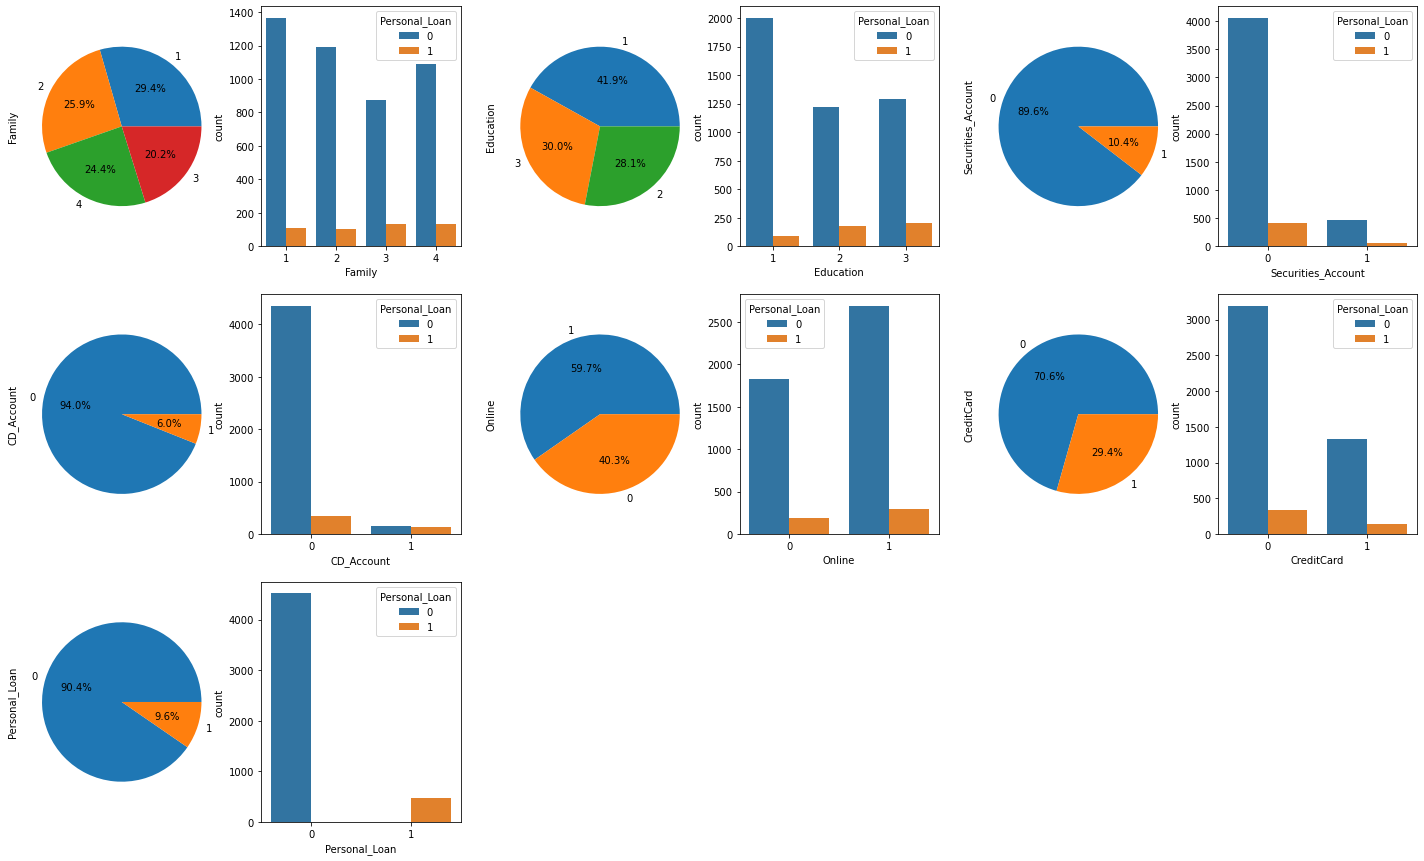

In [26]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cat_cols):
     plot_pie_count(c,3,6,(i*2)+1)

In [27]:
def plot_dist(col):
    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode().tolist()[0]
    plt.axvline(mean,color='r',linestyle='--',linewidth=2)
    plt.axvline(median,color='y',linestyle='-',linewidth=2)
    plt.axvline(mode,color='g',linestyle='-.',linewidth=2)
    sns.histplot(df[col],bins=20,color='orange')
    plt.legend({'Mean %.1f'%mean: mean , 'Median %.1f'%median :median, 'Mode %.1f'%mode: mode})
    plt.title(col)
    

In [28]:
cont_cols

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

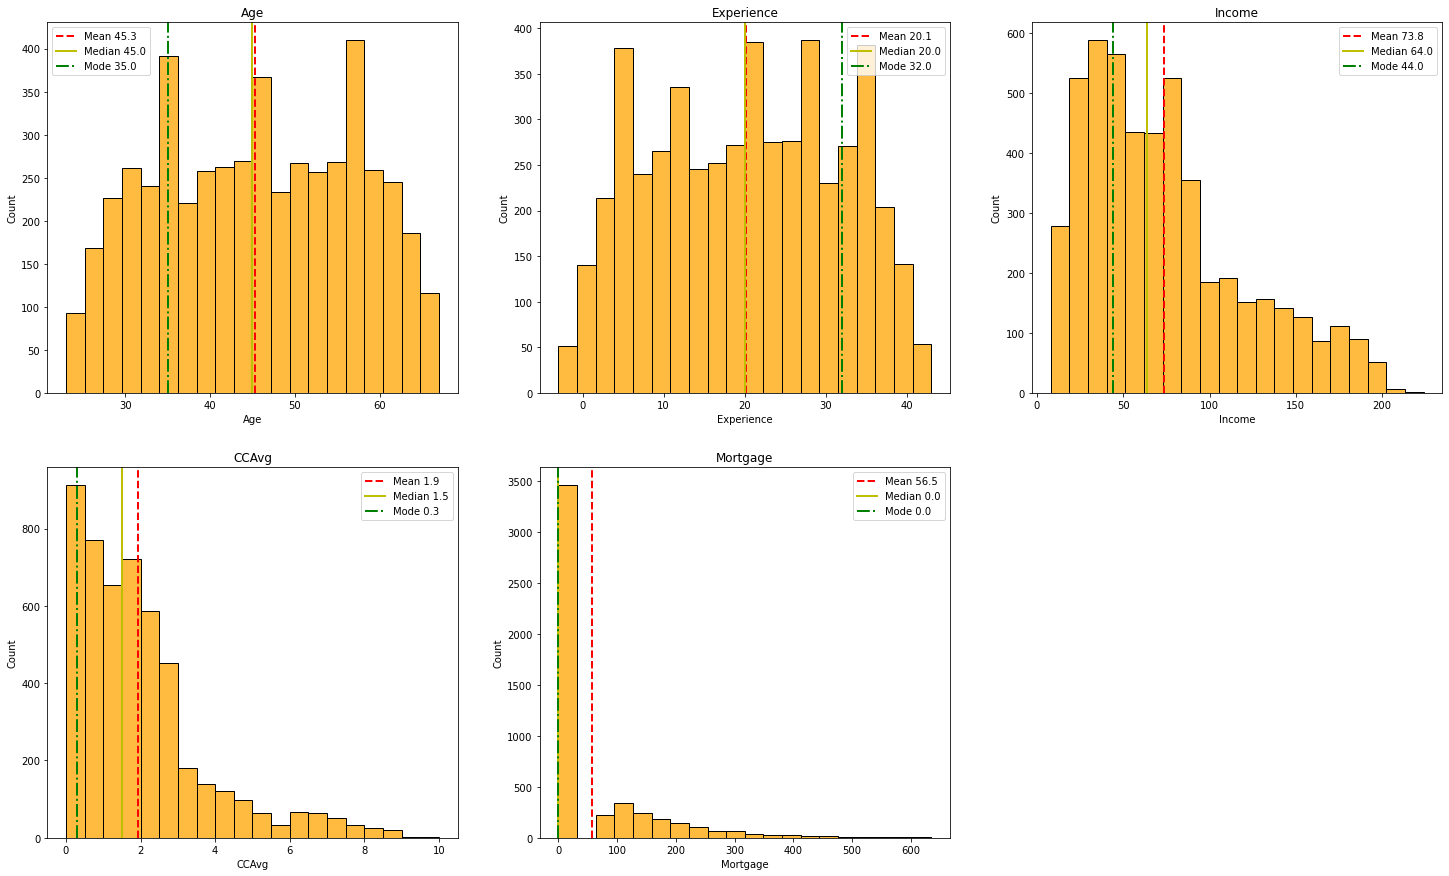

In [29]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cont_cols):
    plt.subplot(2,3,i+1)
    plot_dist(c)

In [30]:
def plot_dist(col,r,c,p):
    for i in range(2):
        plt.subplot(r,c,p+i)
        mean = df[col][df['Personal_Loan']==i].mean()
        median = df[col][df['Personal_Loan']==i].median()
        mode = df[col][df['Personal_Loan']==i].mode().tolist()[0]
        plt.axvline(mean,color='r',linestyle='--',linewidth=2)
        plt.axvline(median,color='b',linestyle='-',linewidth=2)
        plt.axvline(mode,color='g',linestyle='-.',linewidth=2)
        sns.histplot(df[col][df['Personal_Loan']==i],bins=20,color='orange')
        plt.legend({'Mean %.1f'%mean: mean , 'Median %.1f'%median :median, 'Mode %.1f'%mode: mode})
        plt.title(col+'& Personal Loan ={}'.format(i))

In [31]:
cont_cols

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

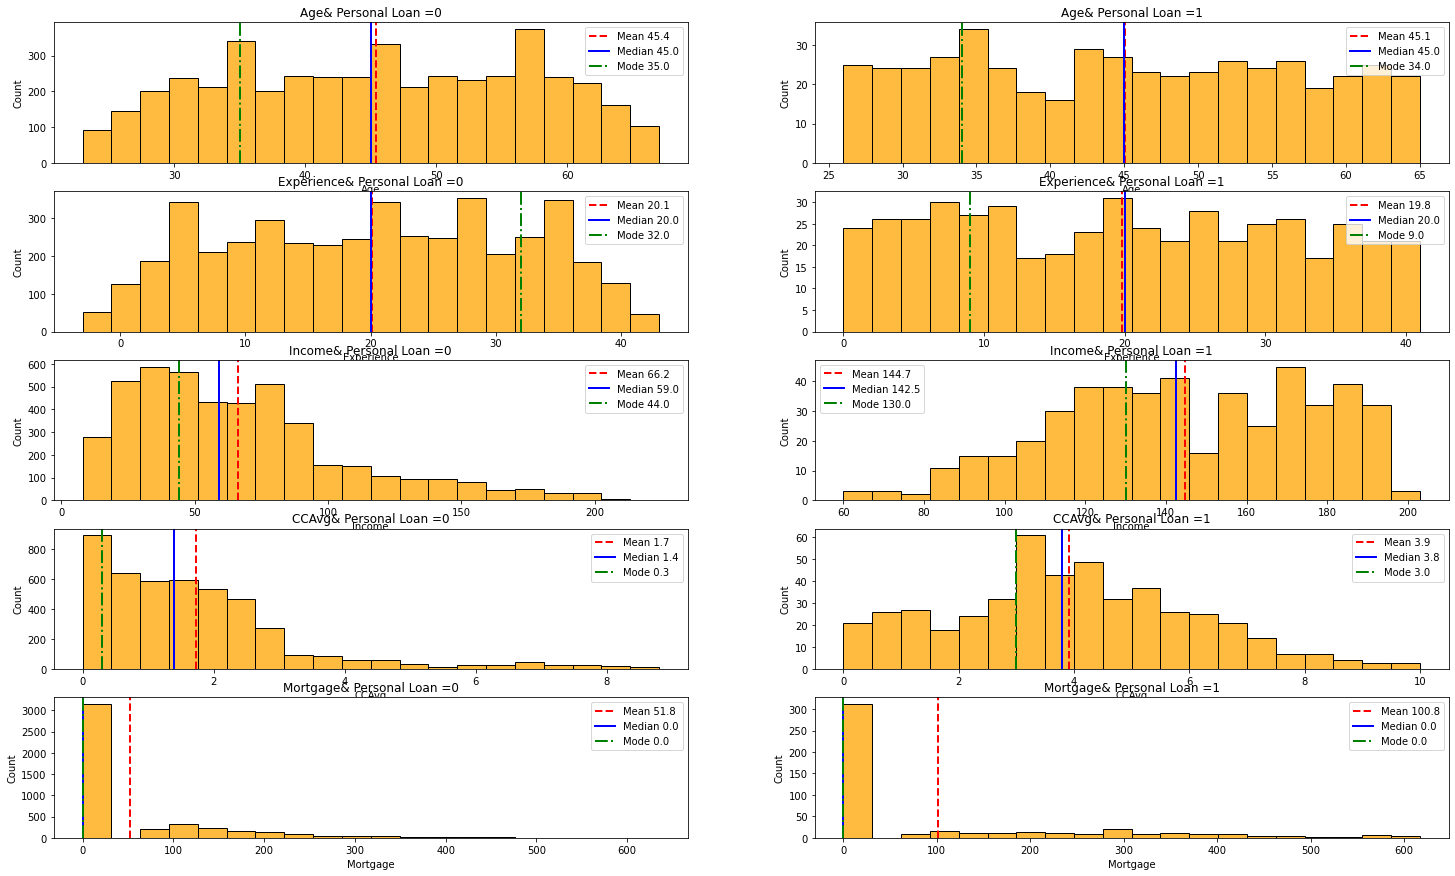

In [32]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cont_cols):
    plot_dist(c,5,2,(i*2)+1)

In [33]:
def plot_dist(col,r,c,p):
    clr=['orange','blue']
    for i in range(2):
        plt.subplot(r,c,p+i)
        mean = df[col][df['Personal_Loan']==i].mean()
        median = df[col][df['Personal_Loan']==i].median()
        mode = df[col][df['Personal_Loan']==i].mode().tolist()[0]
        plt.axvline(mean,color='r',linestyle='--',linewidth=2)
        plt.axvline(median,color='b',linestyle='-',linewidth=2)
        plt.axvline(mode,color='g',linestyle='-.',linewidth=2)
        sns.histplot(df[col][df['Personal_Loan']==i],bins=20,color=clr[i])
        plt.legend({'Mean %.1f'%mean: mean , 'Median %.1f'%median :median, 'Mode %.1f'%mode: mode})
        plt.title(col+'& Personal Loan ={}'.format(i))

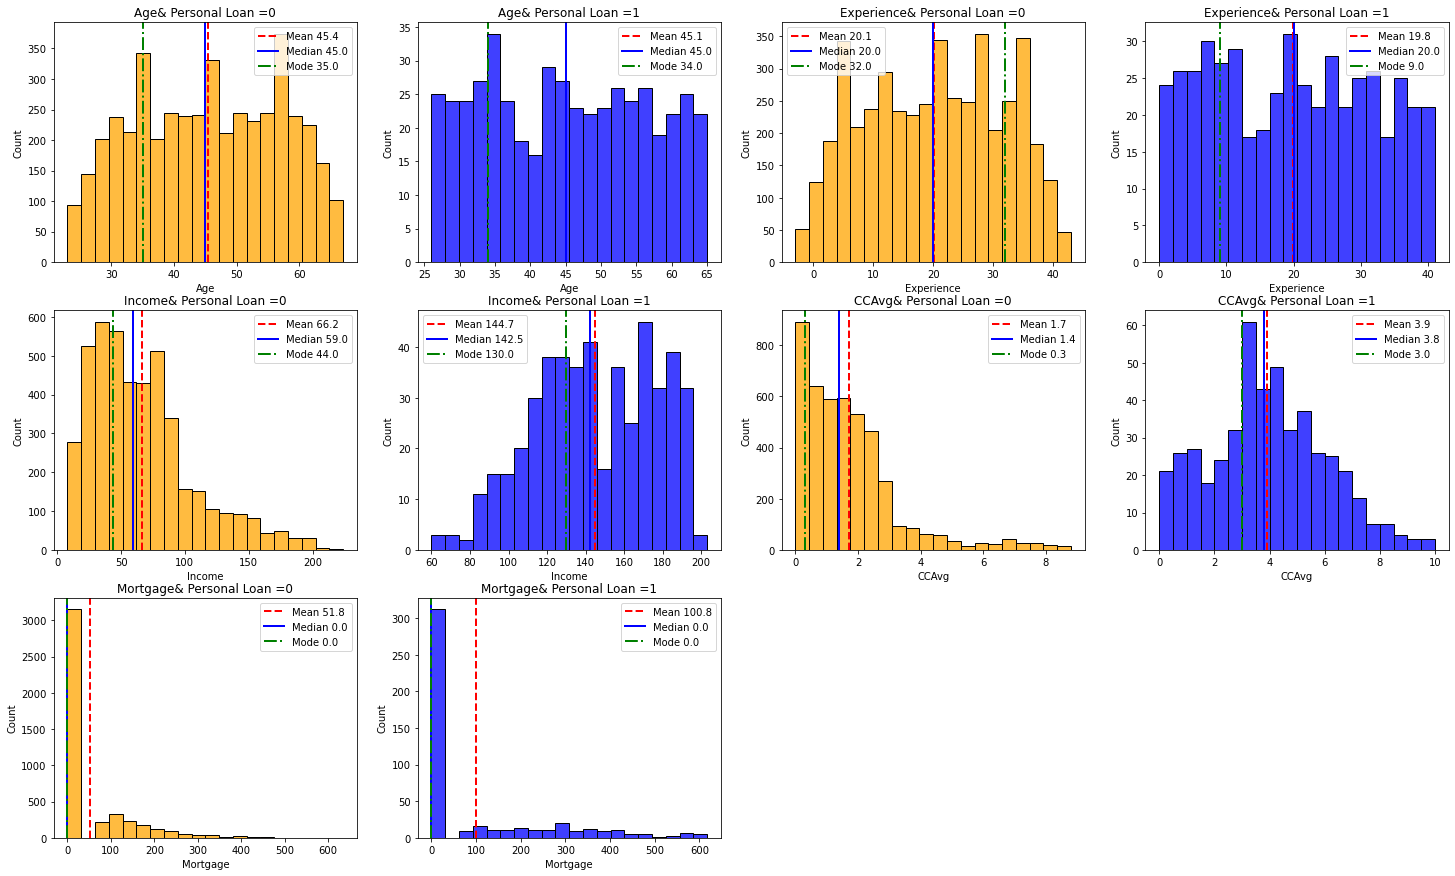

In [34]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cont_cols):
    plot_dist(c,3,4,(i*2)+1)

In [35]:
pd.crosstab(index=df['County'],columns=df['Personal_Loan'].sort_values(ascending=False))

Personal_Loan,0,1
County,,
92634,5,0
92717,19,3
93077,1,0
96651,6,0
Alameda County,456,44
Butte County,17,2
Contra Costa County,73,12
El Dorado County,16,1
Fresno County,24,2


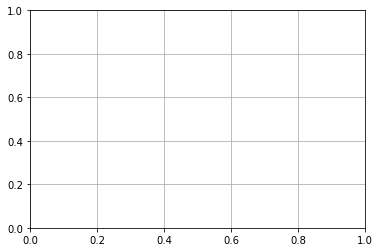

In [36]:
pd.crosstab(index=df['County'],columns=df['Personal_Loan'].sort_values(ascending=False))
plt.grid()

In [37]:
df['County']=df['County'].apply(lambda x:x.replace('County',''))

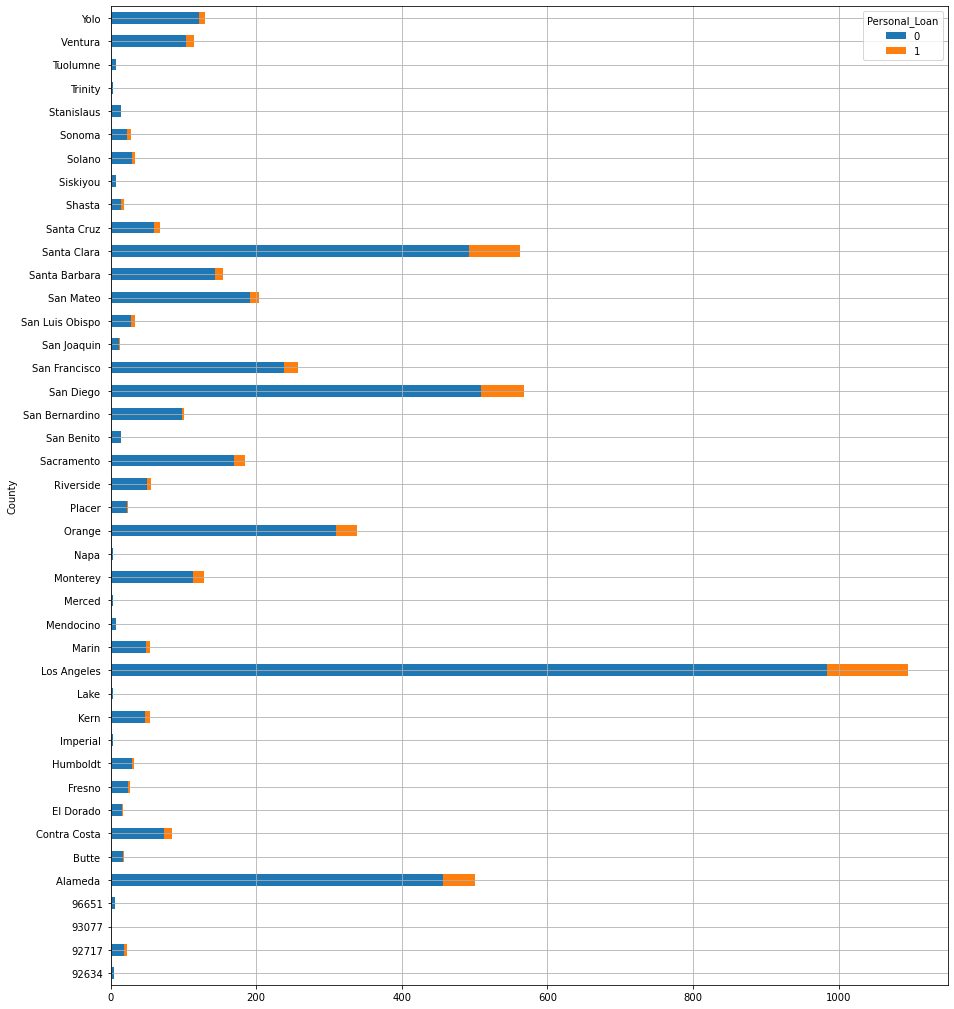

In [38]:
pd.crosstab(index=df['County'],columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,18))
plt.grid()

In [39]:
c200=df['County'].value_counts()>200
c200

Los Angeles          True
San Diego            True
Santa Clara          True
Alameda              True
Orange               True
San Francisco        True
San Mateo            True
Sacramento          False
Santa Barbara       False
Yolo                False
Monterey            False
Ventura             False
San Bernardino      False
Contra Costa        False
Santa Cruz          False
Riverside           False
Marin               False
Kern                False
Solano              False
San Luis Obispo     False
Humboldt            False
Sonoma              False
Fresno              False
Placer              False
92717               False
Butte               False
Shasta              False
El Dorado           False
Stanislaus          False
San Benito          False
San Joaquin         False
Mendocino           False
Siskiyou            False
Tuolumne            False
96651               False
92634               False
Lake                False
Merced              False
Trinity     

In [40]:
c200=(df['County'].value_counts()>200).index
c200

Index(['Los Angeles ', 'San Diego ', 'Santa Clara ', 'Alameda ', 'Orange ',
       'San Francisco ', 'San Mateo ', 'Sacramento ', 'Santa Barbara ',
       'Yolo ', 'Monterey ', 'Ventura ', 'San Bernardino ', 'Contra Costa ',
       'Santa Cruz ', 'Riverside ', 'Marin ', 'Kern ', 'Solano ',
       'San Luis Obispo ', 'Humboldt ', 'Sonoma ', 'Fresno ', 'Placer ',
       '92717', 'Butte ', 'Shasta ', 'El Dorado ', 'Stanislaus ',
       'San Benito ', 'San Joaquin ', 'Mendocino ', 'Siskiyou ', 'Tuolumne ',
       '96651', '92634', 'Lake ', 'Merced ', 'Trinity ', 'Napa ', 'Imperial ',
       '93077'],
      dtype='object')

In [41]:
c200=df['County'].value_counts().index[df['County'].value_counts()>200]
c200

Index(['Los Angeles ', 'San Diego ', 'Santa Clara ', 'Alameda ', 'Orange ',
       'San Francisco ', 'San Mateo '],
      dtype='object')

In [42]:
df['CountyGroup']=df['County'].apply(lambda x: x if x in c200 else 'Other')

In [43]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,...,CCAvg.1,Education.1,Mortgage.1,Personal_Loan.1,Securities_Account.1,CD_Account.1,Online.1,CreditCard.1,County,CountyGroup
0,25,1,49,91107,4,1.6,1,0,0,1,...,1.6,1,0,0,1,0,0,0,Los Angeles,Los Angeles
1,45,19,34,90089,3,1.5,1,0,0,1,...,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles
2,39,15,11,94720,1,1.0,1,0,0,0,...,1.0,1,0,0,0,0,0,0,Alameda,Alameda
3,35,9,100,94112,1,2.7,2,0,0,0,...,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco
4,35,8,45,91330,4,1.0,2,0,0,0,...,1.0,2,0,0,0,0,0,1,Los Angeles,Los Angeles


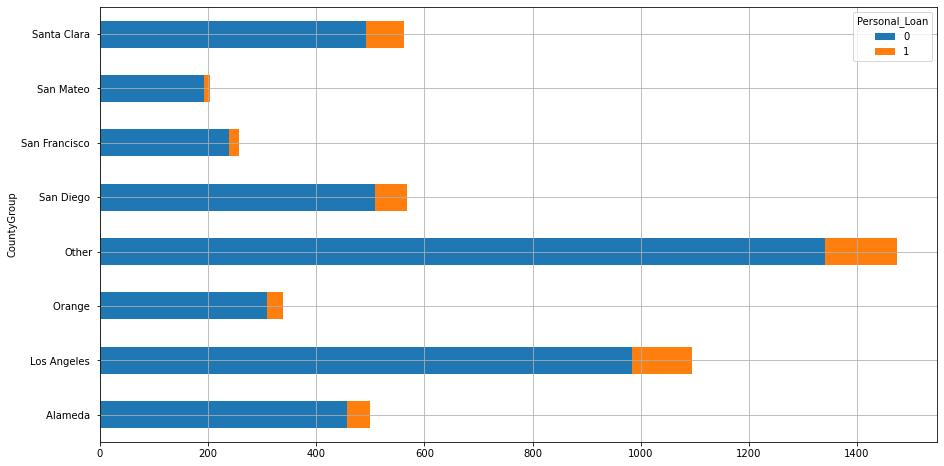

In [44]:
pd.crosstab(index=df['CountyGroup'],columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,8))
plt.grid()

<AxesSubplot:>

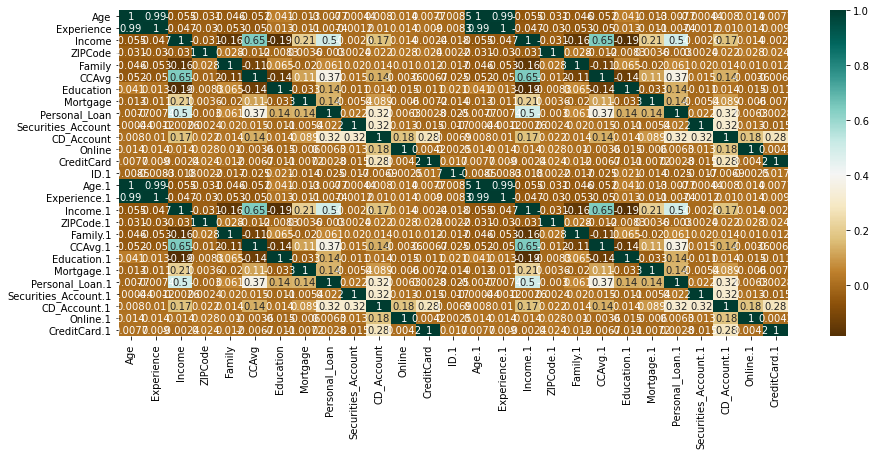

In [45]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='BrBG',annot=True)

<AxesSubplot:>

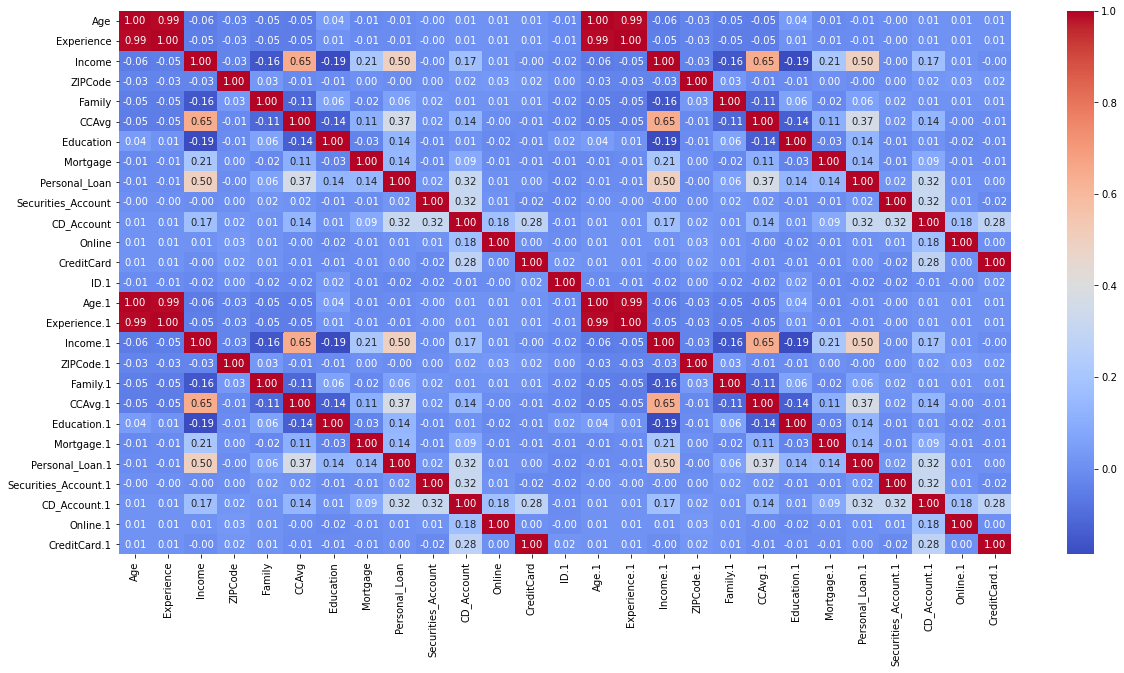

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')

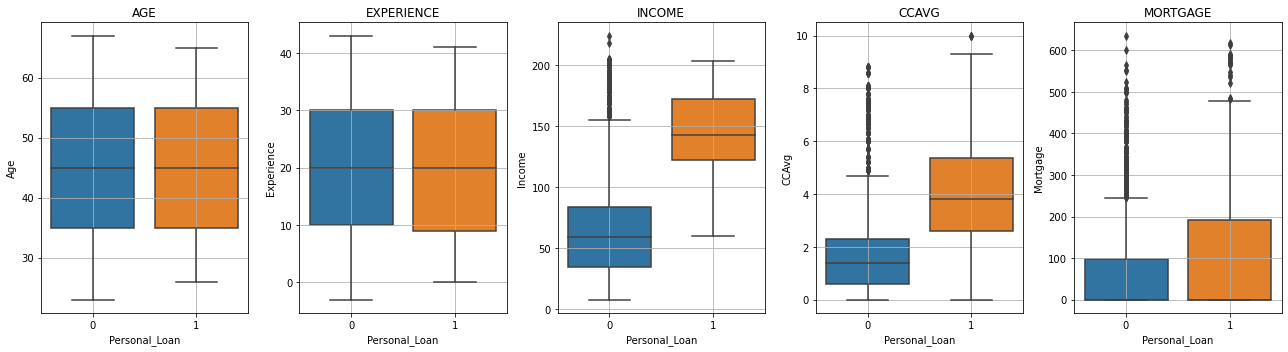

In [47]:
plt.figure(figsize=(18,5))
for i,c in enumerate(cont_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(x='Personal_Loan',y=c,data=df)
    plt.tight_layout()
    plt.title(c.upper())
    plt.grid()

In [48]:
income=df['Income'].copy()

<AxesSubplot:xlabel='Income'>

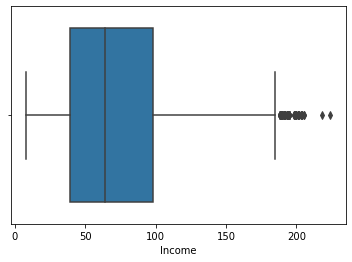

In [49]:
sns.boxplot(income)

In [50]:
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3-Q1
print('IQR is:',IQR)

IQR is: 59.0


In [51]:
Q1

39.0

In [52]:
first_q=Q1-1.5*IQR
third_q=Q3+1.5*IQR
print(first_q)
print(third_q)

-49.5
186.5


In [53]:
income=income[(income<=third_q)&(income>=first_q)]

<AxesSubplot:xlabel='Income'>

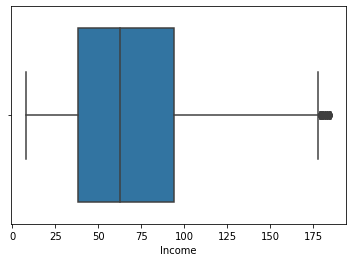

In [54]:
sns.boxplot(income)

In [55]:
sum((income<=third_q)&(income>=first_q))

4904

In [56]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'ID.1', 'Age.1', 'Experience.1',
       'Income.1', 'ZIPCode.1', 'Family.1', 'CCAvg.1', 'Education.1',
       'Mortgage.1', 'Personal_Loan.1', 'Securities_Account.1', 'CD_Account.1',
       'Online.1', 'CreditCard.1', 'County', 'CountyGroup'],
      dtype='object')

In [57]:
ccavg=df['CCAvg'].copy()

<AxesSubplot:xlabel='Income'>

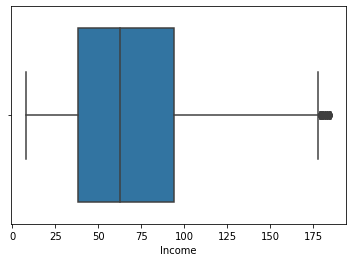

In [58]:
sns.boxplot(income)

In [59]:
Q1 = ccavg.quantile(0.25)
Q3 = ccavg.quantile(0.75)
IQR = Q3-Q1
print('IQR is:',IQR)

IQR is: 1.8


In [60]:
Q1

0.7

In [61]:
first_q=Q1-1.5*IQR
third_q=Q3+1.5*IQR
print(first_q)
print(third_q)

-2.0
5.2


In [62]:
ccavg=ccavg[(ccavg<=third_q)&(ccavg>=first_q)]

<AxesSubplot:xlabel='CCAvg'>

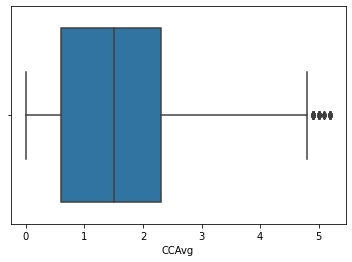

In [63]:
sns.boxplot(ccavg)

In [64]:
x=df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','Online','CreditCard']]
y=df['Personal_Loan']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=101)

# MACHINE LERNING

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [68]:
model_log = LogisticRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
model_svc = SVC().fit(xtrain,ytrain)

In [69]:
model_log.score(xtest,ytest)

0.9488

In [70]:
model_dt.score(xtest,ytest)

0.9848

In [71]:
model_rf.score(xtest,ytest)

0.9848

In [72]:
model_svc.score(xtest,ytest)

0.9144

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
import scipy.stats as stats
import statsmodels.api as sm

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
pd.DataFrame(model_log.coef_,index=['Coefficient'],columns=x.columns).T

,Coefficient
Age,-0.496580
Experience,0.501926
Income,0.049881
Family,0.623536
CCAvg,0.122409
Education,1.629547
Mortgage,0.001198
Securities_Account,0.467144
Online,-0.276095
CreditCard,-0.036394


In [76]:
sns.set_style('whitegrid')

In [77]:
def performance(xt,yt,model):
    yp = model.predict(xt)
    print('Classification Report')
    print('_'*30)
    print(classification_report(yt,yp))
    print('-'*30)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(pd.DataFrame(confusion_matrix(yt,yp),index=['No','Yes'],columns=['No','Yes']),annot=True,fmt='d')
    rocAuc = roc_auc_score(yt,yp)
    fpr,tpr,th = roc_curve(yt,yp)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr,label='Model(area=%0.2f)'%rocAuc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positiven Rate')
    plt.legend(loc='lower right')
    
    plt.show()
                
                

Classification Report
______________________________
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.85      0.53      0.65       113

    accuracy                           0.95      1250
   macro avg       0.90      0.76      0.81      1250
weighted avg       0.95      0.95      0.94      1250

------------------------------


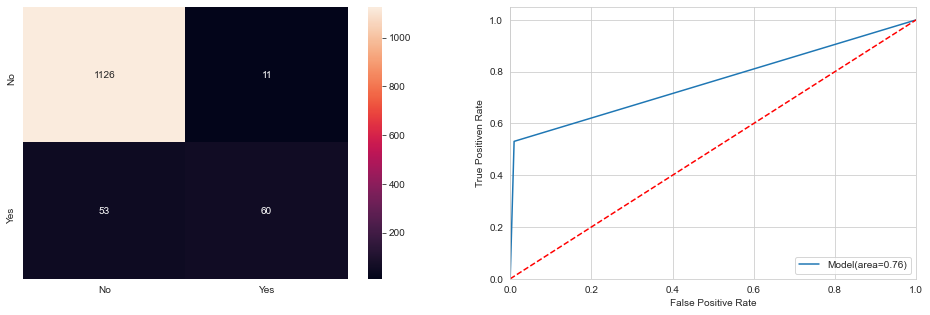

In [78]:
performance(xtest,ytest,model_log)

In [79]:
def performance(xt,yt,model):
    yp = model.predict(xt)
    print('Classification Report')
    print('_'*30)
    print('R2- Score:',model.score(xt,yt))
    print(classification_report(yt,yp))
    print('-'*30)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(pd.DataFrame(confusion_matrix(yt,yp),index=['No','Yes'],columns=['No','Yes']),annot=True,fmt='d')
    plt.title('Confusion Matrix')
    rocAuc = roc_auc_score(yt,yp)
    fpr,tpr,th = roc_curve(yt,yp)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr,label='Model(area=%0.2f)'%rocAuc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positiven Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')
    
    plt.show()
                
                

Classification Report
______________________________
R2- Score: 0.9488
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.85      0.53      0.65       113

    accuracy                           0.95      1250
   macro avg       0.90      0.76      0.81      1250
weighted avg       0.95      0.95      0.94      1250

------------------------------


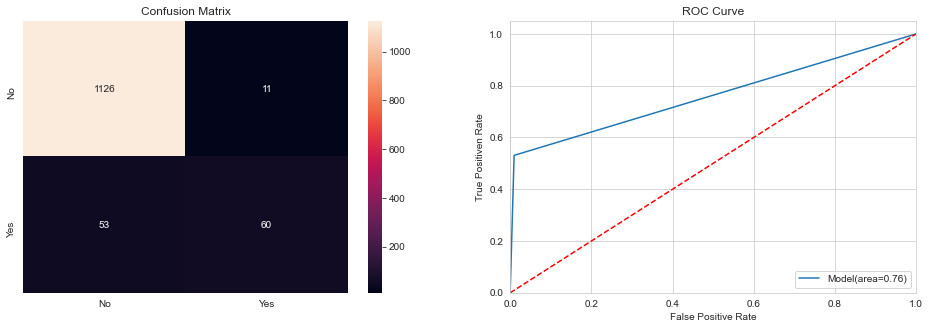

In [80]:
performance(xtest,ytest,model_log)

Classification Report
______________________________
R2- Score: 0.9848
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.92      0.91      0.92       113

    accuracy                           0.98      1250
   macro avg       0.96      0.95      0.95      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


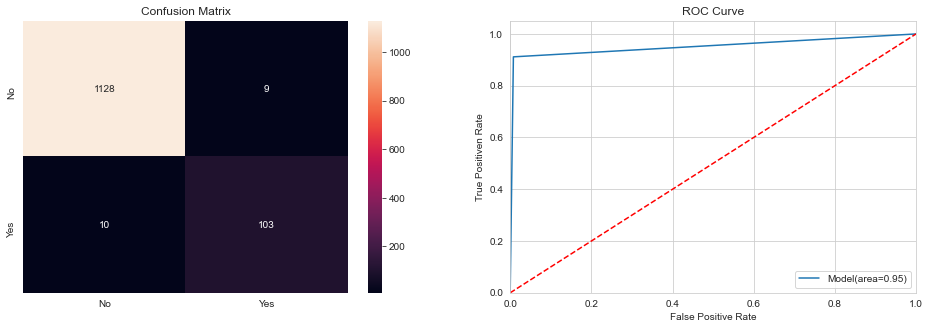

In [81]:
performance(xtest,ytest,model_dt)

Classification Report
______________________________
R2- Score: 0.9848
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1137
           1       1.00      0.83      0.91       113

    accuracy                           0.98      1250
   macro avg       0.99      0.92      0.95      1250
weighted avg       0.99      0.98      0.98      1250

------------------------------


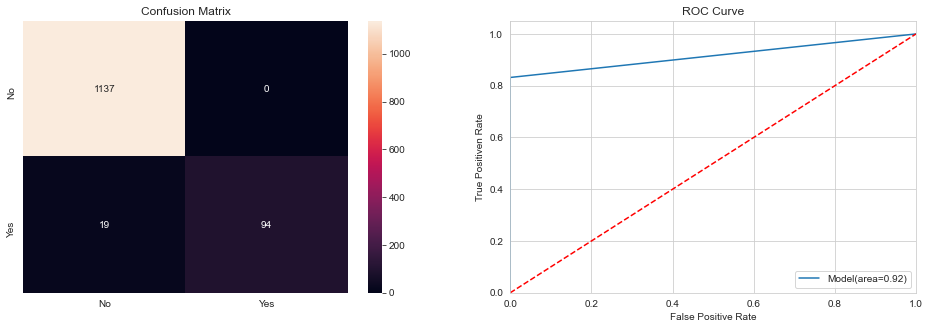

In [82]:
performance(xtest,ytest,model_rf)

Classification Report
______________________________
R2- Score: 0.9144
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1137
           1       0.67      0.11      0.18       113

    accuracy                           0.91      1250
   macro avg       0.79      0.55      0.57      1250
weighted avg       0.90      0.91      0.89      1250

------------------------------


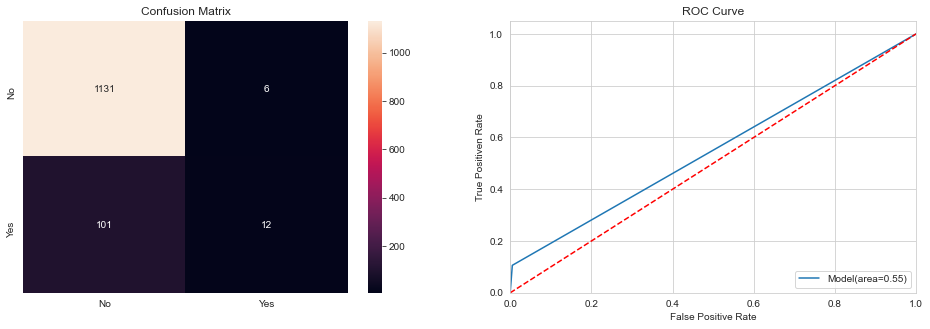

In [83]:
performance(xtest,ytest,model_svc)

# IMPROVING THE PERFORMANCE OF THE MODEL

Classification Report
______________________________
R2- Score: 0.928
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1137
           1       1.00      0.20      0.34       113

    accuracy                           0.93      1250
   macro avg       0.96      0.60      0.65      1250
weighted avg       0.93      0.93      0.91      1250

------------------------------


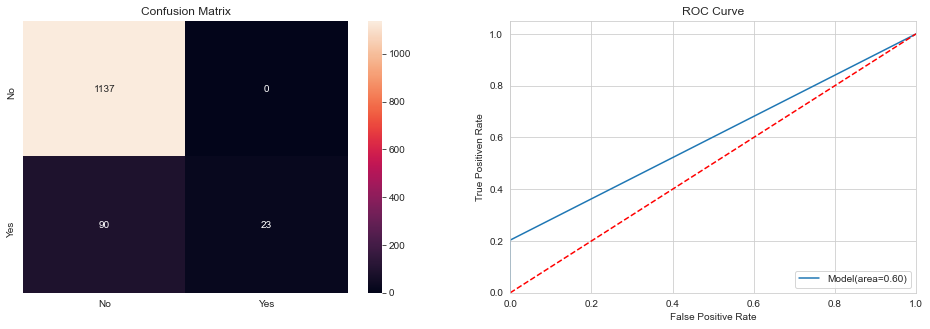

In [84]:
model_log1 = LogisticRegression(solver='newton-cg',random_state=101,class_weight={0:0.9,1:0.1}).fit(xtrain,ytrain)
performance(xtest,ytest,model_log1)

Classification Report
______________________________
R2- Score: 0.8808
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1137
           1       0.42      0.89      0.58       113

    accuracy                           0.88      1250
   macro avg       0.71      0.89      0.75      1250
weighted avg       0.94      0.88      0.90      1250

------------------------------


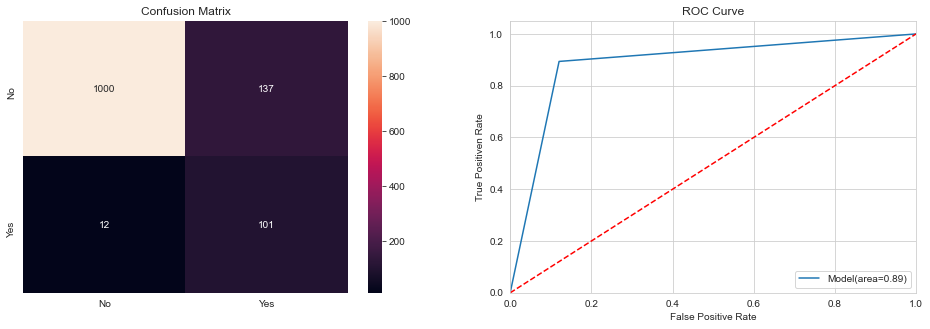

In [85]:
model_log1 = LogisticRegression(solver='newton-cg',random_state=101,class_weight={0:0.1,1:0.9}).fit(xtrain,ytrain)
performance(xtest,ytest,model_log1)

Classification Report
______________________________
R2- Score: 0.9504
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.84      0.56      0.67       113

    accuracy                           0.95      1250
   macro avg       0.90      0.77      0.82      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


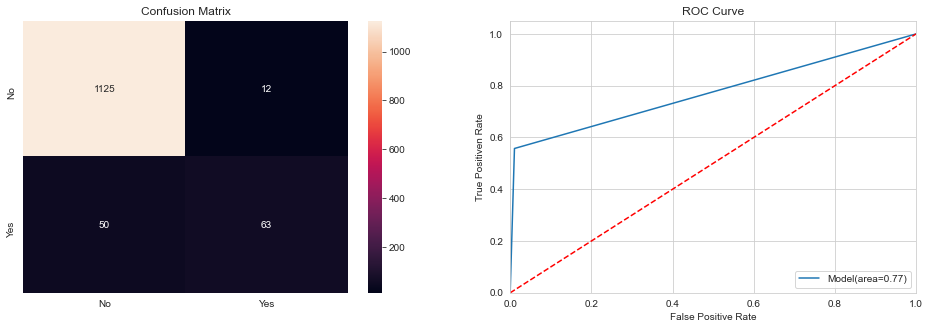

In [86]:
model_log1 = LogisticRegression(solver='newton-cg',random_state=101,class_weight={0:0.8,1:0.9}).fit(xtrain,ytrain)
performance(xtest,ytest,model_log1)

Classification Report
______________________________
R2- Score: 0.9472
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1137
           1       0.76      0.61      0.68       113

    accuracy                           0.95      1250
   macro avg       0.86      0.80      0.82      1250
weighted avg       0.94      0.95      0.94      1250

------------------------------


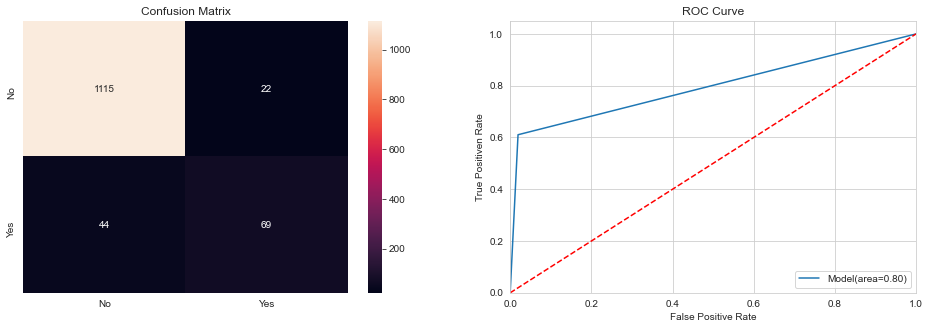

In [87]:
model_log1 = LogisticRegression(solver='newton-cg',random_state=101,class_weight={0:0.5,1:0.75}).fit(xtrain,ytrain)
performance(xtest,ytest,model_log1)

In [88]:
params = {'solver':['1bfgs','newton-cg'],'class_weight':[{0:0.5,1:0.75},{0:0.5,1:0.5},{0:0.2,1:0.8},{0:0.8,1:0.8},{0:0.9,1:0.1},{0:0.1,1:0.9}]}

In [89]:
gcv_legit = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 2/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 3/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 4/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 5/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 1/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.1s
[CV 2/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.1s
[CV 3/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.1s
[CV 4/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.1s
[CV 5/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.1s
[CV 1/5] END ....class_weight={0: 0.5, 1: 0.5}, solver=1bfgs; total time=   0.0s
[CV 2/5] END ....class_weight={0: 0.5, 1: 0

In [90]:
gcv_legit.best_params_

{'class_weight': {0: 0.8, 1: 0.8}, 'solver': 'newton-cg'}

Classification Report
______________________________
R2- Score: 0.9496
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.86      0.53      0.66       113

    accuracy                           0.95      1250
   macro avg       0.91      0.76      0.81      1250
weighted avg       0.95      0.95      0.94      1250

------------------------------


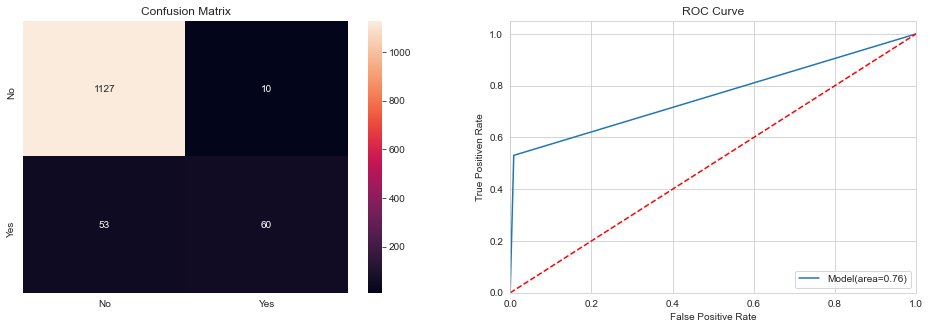

In [91]:
performance(xtest,ytest,gcv_legit.best_estimator_)

In [92]:
pd.DataFrame(gcv_legit.best_estimator_.coef_,index=['Coefficient'],columns=x.columns).T

,Coefficient
Age,-0.118236
Experience,0.130550
Income,0.052425
Family,0.686447
CCAvg,0.128056
Education,1.636111
Mortgage,0.000982
Securities_Account,0.485385
Online,-0.181915
CreditCard,0.018559


In [93]:
xtrain.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'Online', 'CreditCard'],
      dtype='object')

In [94]:
xtrain1=xtrain.drop(['Age','Experience','Family','Securities_Account','Online','CreditCard'],axis=1)
xtest1=xtest.drop(['Age','Experience','Family','Securities_Account','Online','CreditCard'],axis=1)

In [95]:
gcv_legit1=GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain1,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 2/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 3/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 4/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 5/5] END ...class_weight={0: 0.5, 1: 0.75}, solver=1bfgs; total time=   0.0s
[CV 1/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 2/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.1s
[CV 3/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 4/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 5/5] END class_weight={0: 0.5, 1: 0.75}, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....class_weight={0: 0.5, 1: 0.5}, solver=1bfgs; total time=   0.0s
[CV 2/5] END ....class_weight={0: 0.5, 1: 0

Classification Report
______________________________
R2- Score: 0.9456
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1137
           1       0.84      0.50      0.62       113

    accuracy                           0.95      1250
   macro avg       0.89      0.74      0.80      1250
weighted avg       0.94      0.95      0.94      1250

------------------------------


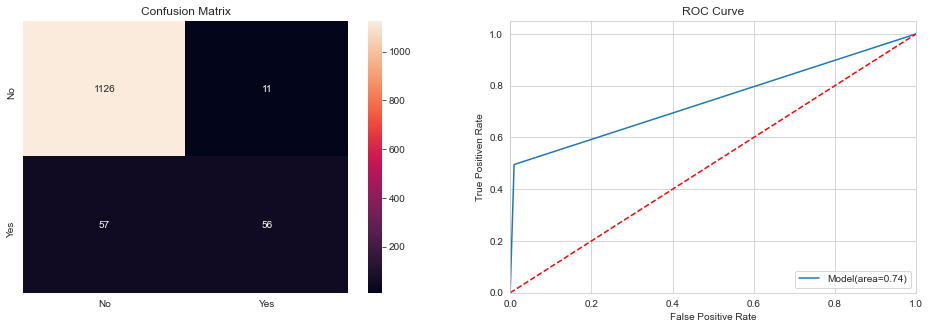

In [96]:
performance(xtest1,ytest,gcv_legit1.best_estimator_)

In [97]:
xtrain_sm=sm.add_constant(xtrain)
xtest_sm=sm.add_constant(xtest)
model_sm_logit=sm.Logit(ytrain,xtrain_sm)
model_sm=model_sm_logit.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.146104
         Iterations 9


In [98]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3739
Method:                           MLE   Df Model:                           10
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.5440
Time:                        17:03:33   Log-Likelihood:                -547.89
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                1.183e-274
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.5053      1.793     -5.860      0.000     -14.019      -6.991
Age                   -0.1227      0.068     -1.809      0.071      -0.256       0.010
Experience             0.1351      0.068      2.001      0.045       0.003       0.267
Income                 0.0528      0.003     19.553      0.000       0.048       0.058
Family                 0.6924      0.079      8.733      0.000       0.537       0.848
CCAvg                  0.1299      0.042      3.058      0.002       0.047       0.213
Education              1.6657      0.121     13.793      0.000       1.429       1.902
Mortgage               0.0010      0.001      1.621      0.105      -0.000       0.002
Securities_Account     0.5253      0.254      2.068      0.039       0.027       1.023
Online                -0.1888      0.162     -1.169      0.242      -0.505       0.128
CreditCard             0.0190      0.174      0.109      0.913      -0.323       0.361
======================================================================================
"""

In [99]:
xtrain_sm2=sm.add_constant(xtrain.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
xtest_sm2=sm.add_constant(xtest.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
model_sm_logit2=sm.Logit(ytrain,xtrain_sm2)
model_sm2=model_sm_logit2.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.148045
         Iterations 9


In [100]:
model_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3745
Method:                           MLE   Df Model:                            4
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.5379
Time:                        17:03:33   Log-Likelihood:                -555.17
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                1.448e-278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1850      0.577    -22.848      0.000     -14.316     -12.054
Income         0.0530      0.003     19.990      0.000       0.048       0.058
Family         0.6778      0.078      8.644      0.000       0.524       0.832
CCAvg          0.1140      0.042      2.727      0.006       0.032       0.196
Education      1.6267      0.118     13.780      0.000       1.395       1.858
==============================================================================
"""

In [101]:
model_sm2.predict(xtest_sm2)

1718    0.002092
2511    0.025877
345     0.001461
2521    0.000821
54      0.005108
          ...   
1881    0.037434
2800    0.000900
1216    0.046260
1648    0.020305
3063    0.011328
Length: 1250, dtype: float64

In [102]:
ytest

1718    0
2511    1
345     0
2521    0
54      0
       ..
1881    0
2800    0
1216    0
1648    0
3063    0
Name: Personal_Loan, Length: 1250, dtype: int64

In [103]:
ypred_sm=model_sm2.predict(xtest_sm2)>0.1

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(ytest,ypred_sm)*100

88.08

In [106]:
print(classification_report(ytest,ypred_sm))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1137
           1       0.42      0.88      0.57       113

    accuracy                           0.88      1250
   macro avg       0.70      0.88      0.75      1250
weighted avg       0.94      0.88      0.90      1250



In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
xtrain_sc=StandardScaler().fit_transform(xtrain)
xtest_sc=StandardScaler().fit_transform(xtest)

In [109]:
xtrain_sm3=sm.add_constant(xtrain.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
xtest_sm3=sm.add_constant(xtest.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis=1))
model_sm_logit3=sm.Logit(ytrain,xtrain_sm3)
model_sm3=model_sm_logit3.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.148045
         Iterations 9


In [110]:
model_sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3745
Method:                           MLE   Df Model:                            4
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.5379
Time:                        17:03:34   Log-Likelihood:                -555.17
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                1.448e-278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1850      0.577    -22.848      0.000     -14.316     -12.054
Income         0.0530      0.003     19.990      0.000       0.048       0.058
Family         0.6778      0.078      8.644      0.000       0.524       0.832
CCAvg          0.1140      0.042      2.727      0.006       0.032       0.196
Education      1.6267      0.118     13.780      0.000       1.395       1.858
==============================================================================
"""

In [111]:
ypred_sm3=model_sm3.predict(xtest_sm3)>0.15

In [112]:
accuracy_score(ytest,ypred_sm3)*100

90.64

In [113]:
print(classification_report(ytest,ypred_sm3))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1137
           1       0.49      0.83      0.62       113

    accuracy                           0.91      1250
   macro avg       0.74      0.87      0.78      1250
weighted avg       0.94      0.91      0.92      1250



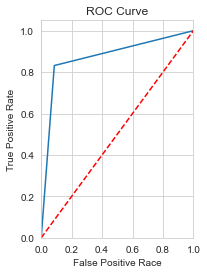

In [114]:
rocAuc=roc_auc_score(ytest,ypred_sm3)
fpr,tpr,th=roc_curve(ytest,ypred_sm3)
plt.subplot(1,2,2)
plt.plot(fpr,tpr,label='Model(area=%0.2f)'%rocAuc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Race')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#IMPROVING/VISUALIZING DECISION TREE

In [115]:
from sklearn import tree

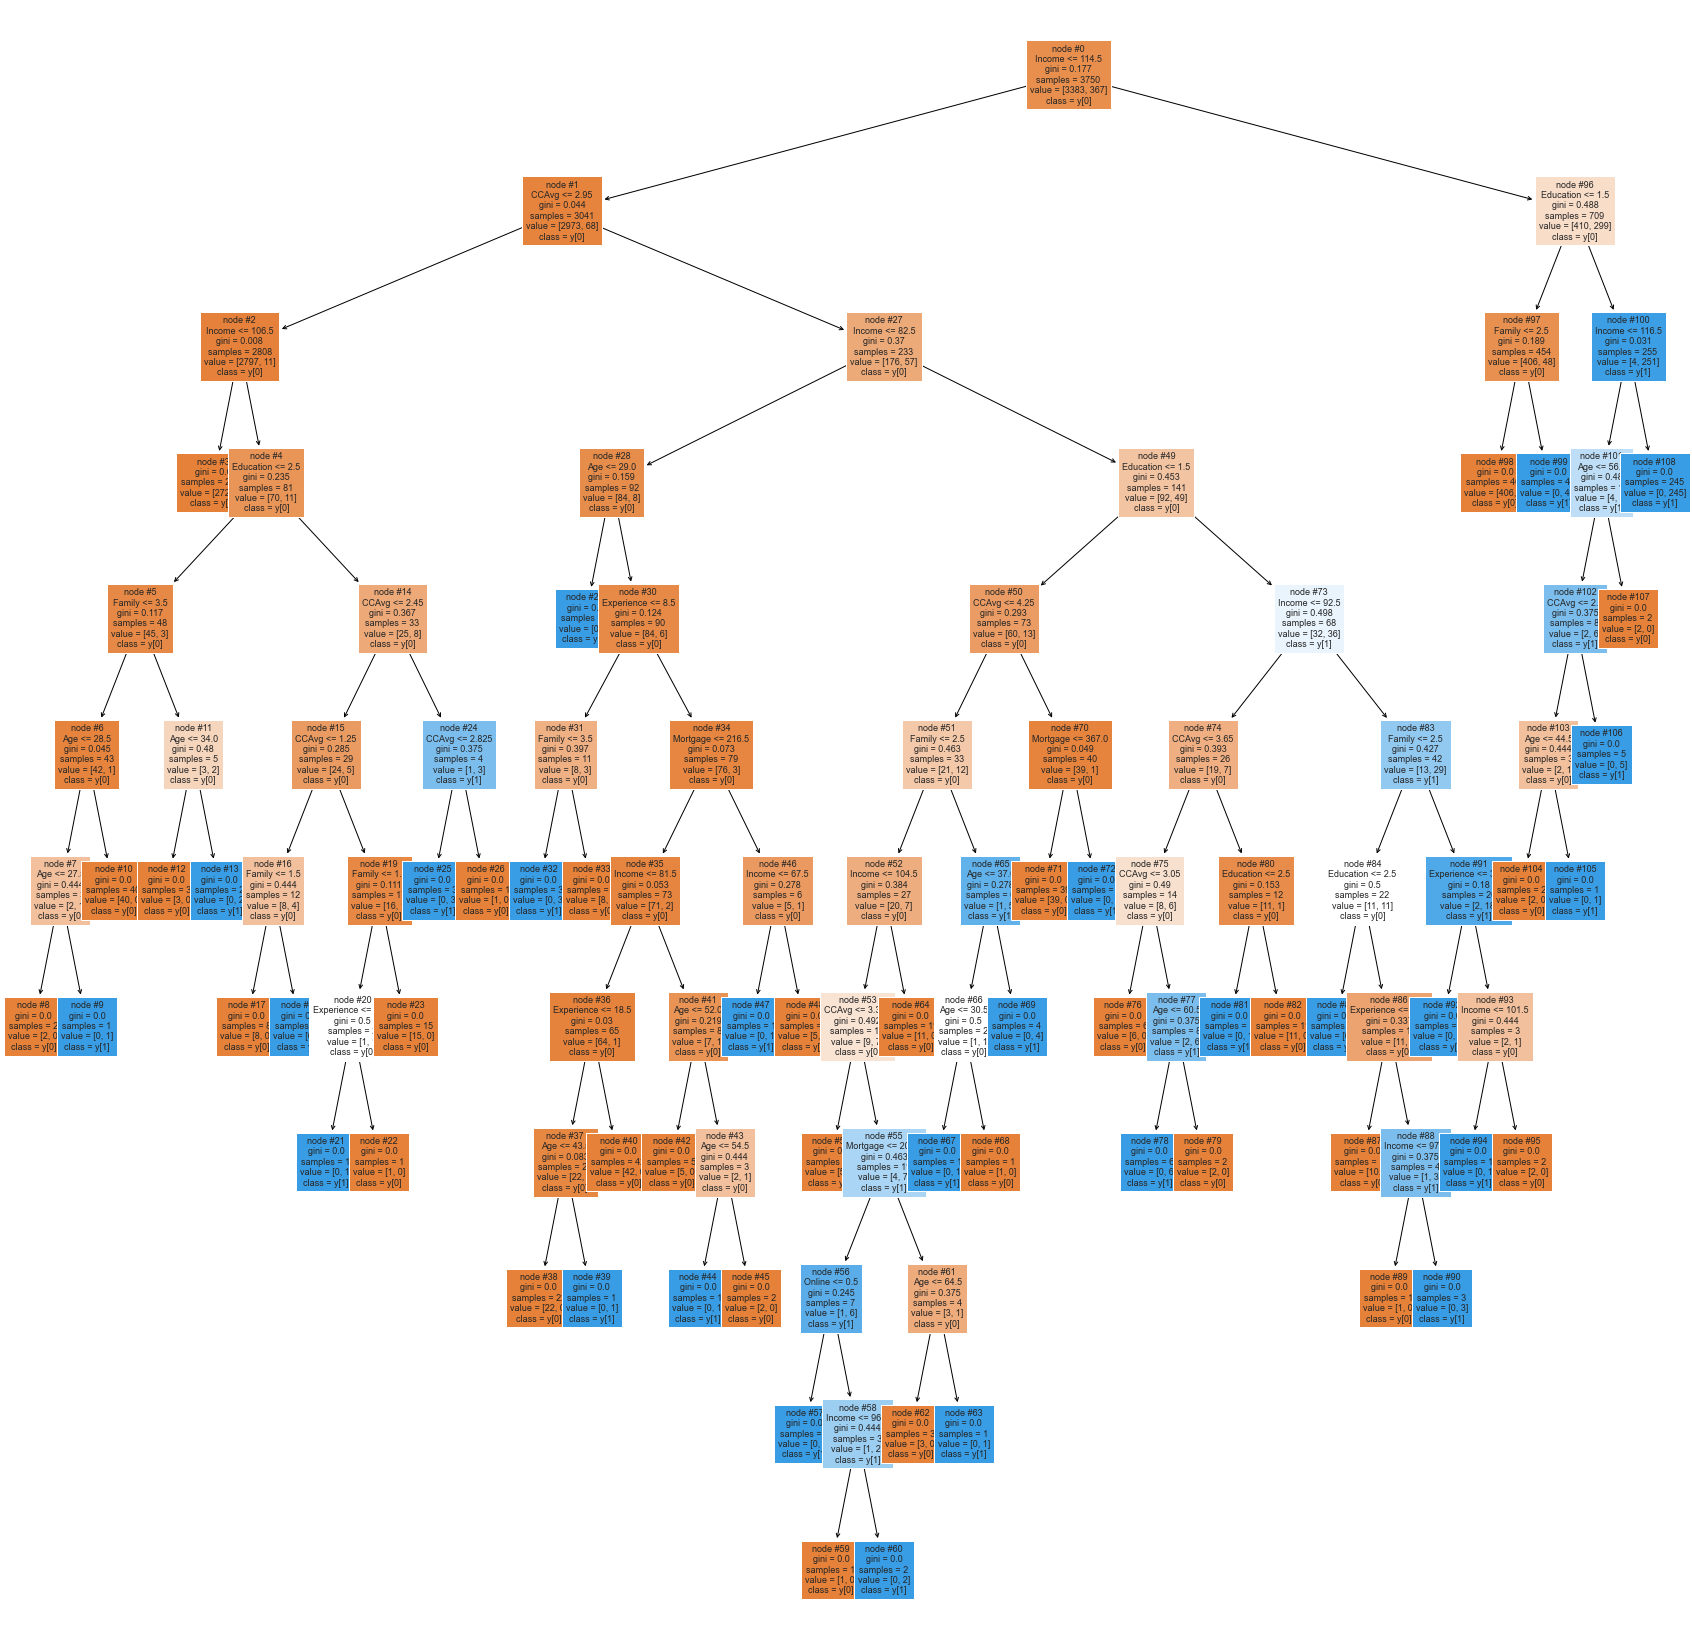

In [116]:
plt.figure(figsize=(30,30))
out=tree.plot_tree(model_dt,feature_names=x.columns,filled=True,fontsize=9,node_ids=True,class_names=True)
for p in out:
    arrow=p.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

Text(0.5, 0, 'Importance')

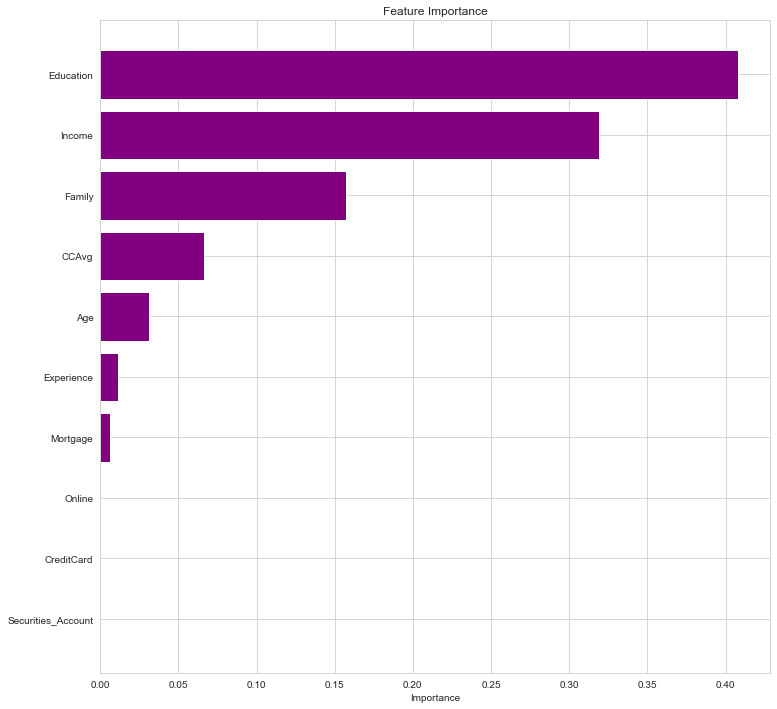

In [117]:
importance = model_dt.feature_importances_
idx=np.argsort(importance)
plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(idx)),importance[idx],color='purple',align='center')
plt.yticks(range(len(idx)),[x.columns[i] for i in idx])
plt.xlabel('Importance')

In [118]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
params={'criterion':['gini','entropy'],
        'min_samples_leaf':[1,2,5,7,11,15,20,25],
        'max_depth':np.arange(1,10),
        'max_leaf_nodes':[5,10,15,20,25,30,35]}
        


In [120]:
model_grid_dt_1=GridSearchCV(DecisionTreeClassifier(),param_grid=params).fit(xtrain,ytrain)

In [121]:
model_grid_dt_1.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1}

Classification Report
______________________________
R2- Score: 0.9824
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.93      0.87      0.90       113

    accuracy                           0.98      1250
   macro avg       0.96      0.93      0.94      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


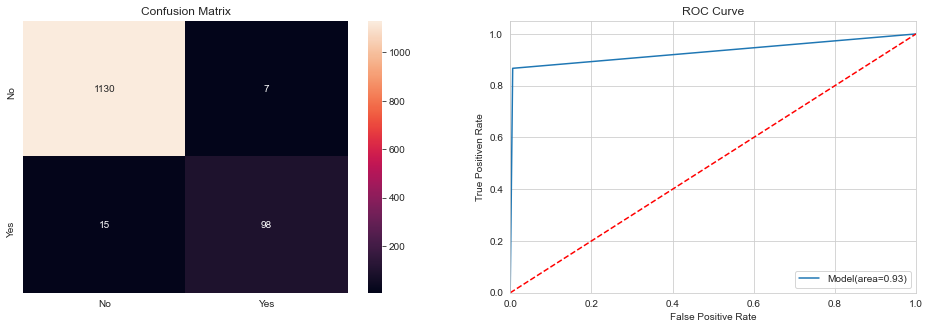

In [122]:
performance(xtest,ytest,model_grid_dt_1.best_estimator_)

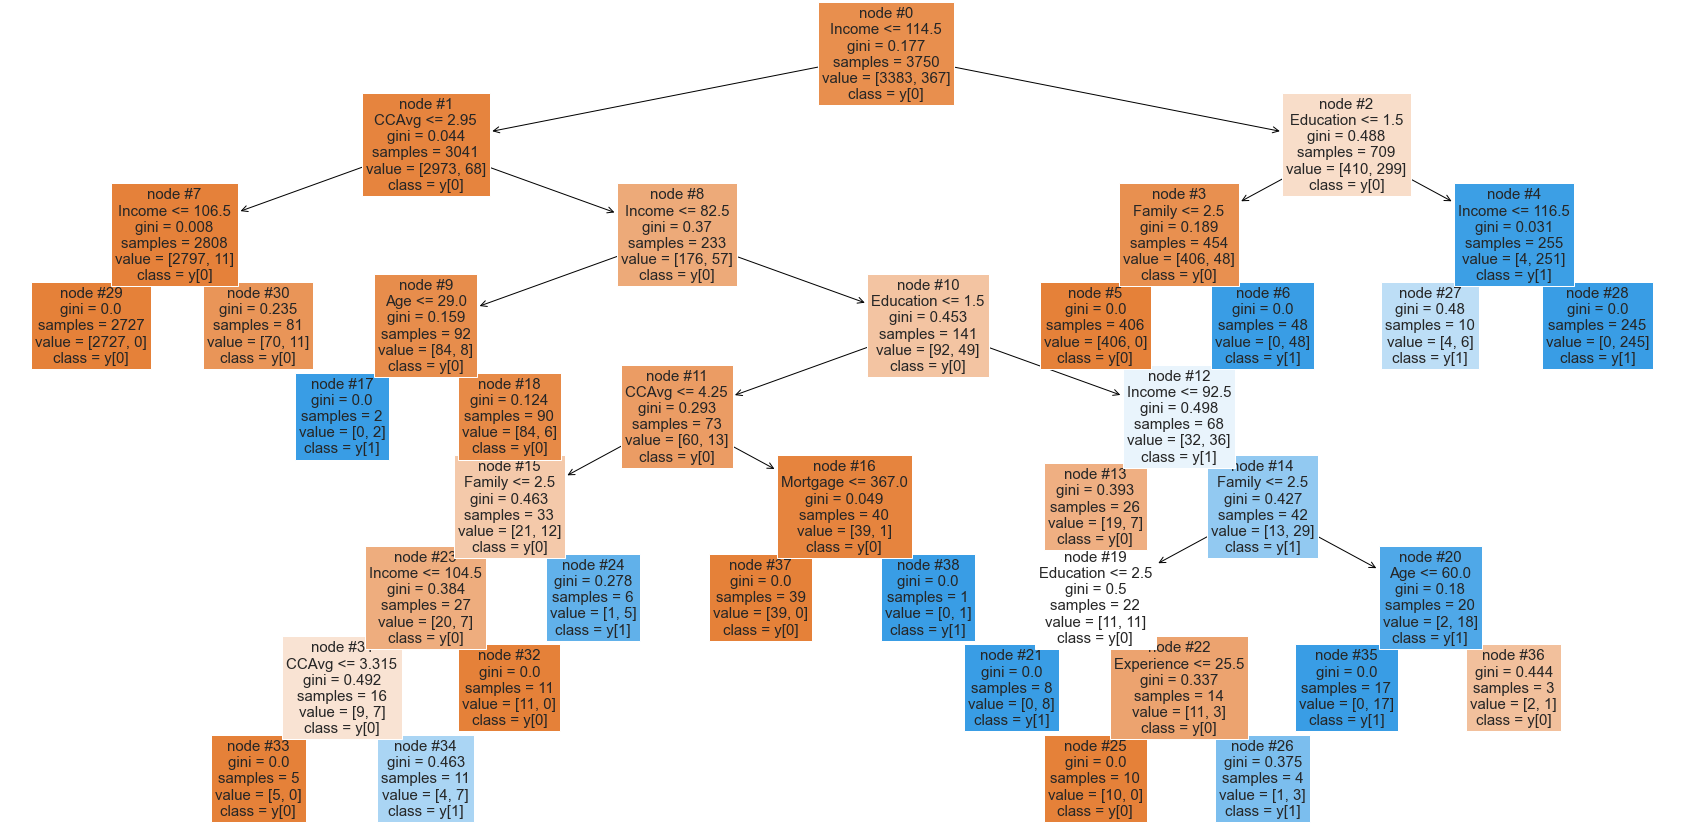

In [123]:
plt.figure(figsize=(30,15))
out=tree.plot_tree(model_grid_dt_1.best_estimator_,feature_names=x.columns,filled=True,fontsize=15,node_ids=True,class_names=True)
for p in out:
    arrow=p.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [124]:
params_rf={'n_estimators':np.arange(2,151,5),
        'criterion':['gini','entropy'],
           'min_samples_leaf':[1,2,5,7,11,15,20,25],
           'max_depth':np.arange(1,10),
           'max_leaf_nodes':[5,10,15,20,25,30,35]}
        


In [ ]:
model_grid_rf_1=GridSearchCV(RandomForestClassifier(),param_grid=params_rf,verbose=3).fit(xtrain,ytrain)

Fitting 5 folds for each of 30240 candidates, totalling 151200 fits
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=7; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=7; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=7; total time=   0.0s
[CV 4/5] END

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=72; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=72; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=72; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=72; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=77; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=77; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=77; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=77; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_

[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=142; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=142; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=142; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=147; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=147; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=147; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=147; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=147; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=62; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=62; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=67; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=67; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=67; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=67; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=67; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=72; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=132; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=137; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=137; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=137; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=137; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=137; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=142; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=142; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=57; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=57; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=57; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=57; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=57; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=62; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=62; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=62; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=127; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=127; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=127; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=127; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=132; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=132; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=132; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=5, n_estimators=132; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=47; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=47; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=52; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=52; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=52; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=52; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=52; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=57; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=117; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=122; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=122; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=122; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=122; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=122; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=127; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=7, n_estimators=127; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=42; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=42; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=42; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=42; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=47; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=47; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=47; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=47; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=112; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=112; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=112; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=112; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=117; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=117; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=117; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=11, n_estimators=117; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=32; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=32; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=32; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=32; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=37; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=37; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=37; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=37; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=102; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=102; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=102; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=107; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=107; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=107; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=107; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=15, n_estimators=107; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=22; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=27; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=27; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=27; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=27; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=27; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=32; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=32; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=97; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=97; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=97; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=97; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=97; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=102; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=102; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=20, n_estimators=102; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, m

[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=17; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=17; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=22; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=22; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=22; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=22; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=22; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=27; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=87; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=92; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=92; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=92; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=92; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=92; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=97; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=25, n_estimators=97; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=5, min_

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=7; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=12; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=12; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=12; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=12; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=12; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=82; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=82; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=82; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=82; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=82; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=87; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=87; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=87; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=7; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=12; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=12; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=12; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=12; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=12; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=82; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=82; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=82; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=82; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=82; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=87; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=87; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=87; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=7; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=12; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=12; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=12; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=12; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=12; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=82; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=82; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=82; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=82; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=82; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=87; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=87; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, n_estimators=87; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min

[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=7; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=7; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_s

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=77; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=82; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=87; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=87; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=147; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=2; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=2; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=2; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=2; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=2; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=7; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=7; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, mi

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=72; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=72; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=72; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=72; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=72; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=77; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=77; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=77; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=142; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=142; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=142; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=142; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=142; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=147; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=147; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=11, n_estimators=147; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_le

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=62; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=62; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=62; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=62; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=67; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=67; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=67; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=67; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=132; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=132; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=132; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=132; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=137; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=137; total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=137; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, n_estimators=137; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_le

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=52; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=52; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=52; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=52; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=57; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=57; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=57; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=57; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=122; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=122; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=122; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=122; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=127; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=127; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=127; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=20, n_estimators=127; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_le

[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=42; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=42; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=42; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=47; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=47; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=47; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=47; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=47; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=112; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=112; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=112; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=117; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=117; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=117; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=117; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=10, min_samples_leaf=25, n_estimators=117; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_le

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=32; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=37; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=37; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=37; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=37; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=37; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=42; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=42; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=102; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=107; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=107; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=107; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=107; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=107; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=22; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=27; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=27; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=27; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=27; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=27; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=97; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=97; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=97; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=97; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=97; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, 

[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=17; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=17; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=87; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=92; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=92; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=92; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=92; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=92; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=7; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=12; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=82; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=87; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=87; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=7, n_estimators=87; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=7; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=77; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=82; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=82; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=82; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=82; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=82; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=87; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=87; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=11, n_estimators=147; total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=7; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=7; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, m

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=67; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=72; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=72; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=72; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=72; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=72; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=77; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=77; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=137; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=147; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=15, n_estimators=147; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_le

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=57; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=67; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=67; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=127; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=132; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=137; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=20, n_estimators=137; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_le

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=52; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=52; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=52; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=52; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=52; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=57; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=57; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=57; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=122; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=122; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=122; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=122; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=122; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=127; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=127; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=15, min_samples_leaf=25, n_estimators=127; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_le

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=42; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=42; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=42; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=42; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=42; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=47; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=47; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=47; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=117; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=117; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=117; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=37; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=37; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=37; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=107; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=107; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=107; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=107; total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=32; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=92; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=97; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=102; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, n_estimators=102; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, m

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=22; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=22; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=22; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=22; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min

[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=87; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=87; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=87; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=92; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=92; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=92; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=92; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=7, n_estimators=92; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=7; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=77; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=82; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=82; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=82; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=82; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=82; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=87; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=87; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=11, n_estimators=147; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=7; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=7; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, m

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=72; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=72; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=72; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=72; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=72; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=77; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=77; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=77; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=142; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=147; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=147; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=147; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_le

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=62; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=67; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=67; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=67; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=132; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=137; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=137; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=137; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_le

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=52; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=52; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=52; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=52; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=57; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=57; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=57; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=57; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=122; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=122; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=122; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=122; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=127; total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=127; total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=127; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=20, min_samples_leaf=25, n_estimators=127; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_le

[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=42; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=42; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=42; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=47; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=47; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=47; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=47; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=47; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min

[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=112; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=117; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=117; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=117; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=117; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=1, n_estimators=117; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=32; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=32; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=37; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=37; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=37; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=37; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=37; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min

[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=102; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=107; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=107; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=107; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=107; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=107; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=2, n_estimators=112; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes

[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=22; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=27; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=32; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=92; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=97; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=102; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=5, n_estimators=102; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, m

[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=17; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=22; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=22; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=22; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min

[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=87; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=87; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=87; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=87; total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=92; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=92; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=92; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=7, n_estimators=92; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=7; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=12; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=17; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=17; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=

[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=77; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=82; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=82; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=82; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=82; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=82; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=87; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, max_leaf_nodes=25, min_samples_leaf=11, n_estimators=87; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_leaf_nodes